In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
#Original President Data - Presidents listed per row 
president_data = pd.read_json("Resources/PresList.json")
president_data = president_data[["number", "president", "party", "took_office", "left_office"]]
president_data.set_index("number")
president_data.head()

,number,president,party,took_office,left_office
0,1,George Washington,No Party,1789-04-30,1797-03-04
1,2,John Adams,Federalist,1797-03-04,1801-03-04
2,3,Thomas Jefferson,Democratic-Republican,1801-03-04,1809-03-04
3,4,James Madison,Democratic-Republican,1809-03-04,1817-03-04
4,5,James Monroe,Democratic-Republican,1817-03-04,1825-03-04


In [3]:
# Turning Took Office & Left Office Columns to Date Time 
president_data.took_office=pd.to_datetime(president_data['took_office'])
president_data.left_office=pd.to_datetime(president_data['left_office'])


C:\Users\ksmur\Anaconda3\envs\pandas\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


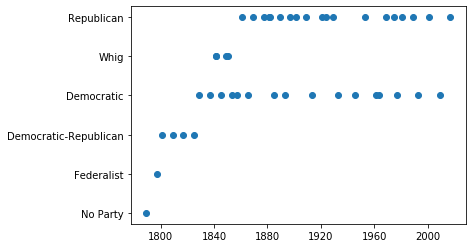

In [4]:
# Party Over Time 
plt.scatter(president_data["took_office"], president_data["party"])

In [5]:
#SNP Data Pull 
snp500_data=pd.read_csv("Resources/SP500data_csv.csv")
snp500_data.head()
sp500 = snp500_data[["Date", "SP500"]]
sp500.head()

,Date,SP500
0,1871-01-01,4.44
1,1871-02-01,4.50
2,1871-03-01,4.61
3,1871-04-01,4.74
4,1871-05-01,4.86


In [6]:
#Bins are years & labels are president names 
binning = []
labels = []

for index, row in president_data.iterrows():
    binning.append(row['took_office'])
    labels.append(row['president'])

binning.append("2019-08-27")

In [7]:
#Working on sp500 - Create President Columns, and changing dates to date time 
sp500.Date = pd.to_datetime(sp500["Date"])
binning = pd.to_datetime(binning)
bins = pd.cut(sp500["Date"], binning, labels = labels)
sp500["President"] = bins
sp500

C:\Users\ksmur\Anaconda3\envs\pandas\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\ksmur\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,SP500,President
0,1871-01-01,4.44,Ulysses S. Grant
1,1871-02-01,4.50,Ulysses S. Grant
2,1871-03-01,4.61,Ulysses S. Grant
3,1871-04-01,4.74,Ulysses S. Grant
4,1871-05-01,4.86,Ulysses S. Grant
5,1871-06-01,4.82,Ulysses S. Grant
6,1871-07-01,4.73,Ulysses S. Grant
7,1871-08-01,4.79,Ulysses S. Grant
8,1871-09-01,4.84,Ulysses S. Grant
9,1871-10-01,4.59,Ulysses S. Grant


In [8]:
#Just President and party DF
president_party = president_data[["president", "party"]]
president_party2=president_party.rename(columns={"president":"President", "party":"Party"})
president_join=pd.merge(sp500, president_party2, on="President", how="inner")
#president_party2.columns
president_join.head()

,Date,SP500,President,Party
0,1871-01-01,4.44,Ulysses S. Grant,Republican
1,1871-02-01,4.50,Ulysses S. Grant,Republican
2,1871-03-01,4.61,Ulysses S. Grant,Republican
3,1871-04-01,4.74,Ulysses S. Grant,Republican
4,1871-05-01,4.86,Ulysses S. Grant,Republican


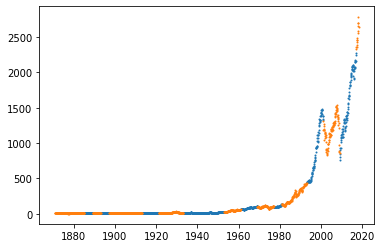

In [9]:
#Democrats and Republicans and respective SP500 prices

democrat = president_join[president_join.Party == "Democratic"] 
republican = president_join[president_join.Party == "Republican"]
#Ulysses = republican.President.loc[["Ulysses S. Grant"]]
#Ulysses

#republican 

plt.scatter(democrat["Date"], democrat["SP500"], s= 1)
plt.scatter(republican["Date"], republican ["SP500"], s= 1)

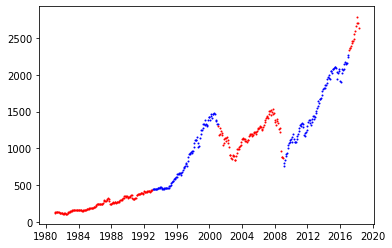

In [10]:
reagan=president_join.loc[president_join['President']=='Ronald Reagan']
bushsr=president_join.loc[president_join['President']=='George H. W. Bush']
clinton=president_join.loc[president_join['President']=='Bill Clinton']
bushjr=president_join.loc[president_join['President']=='George W. Bush']
obama=president_join.loc[president_join['President']=='Barack Obama']
trump=president_join.loc[president_join['President']=='Donald J. Trump']

plt.scatter(reagan["Date"], reagan["SP500"], s= 1, color="red")
plt.scatter(bushsr["Date"], bushsr["SP500"], s= 1, color="red")
plt.scatter(clinton["Date"], clinton["SP500"], s= 1, color="blue")
plt.scatter(bushjr["Date"], bushjr["SP500"], s= 1, color="red")
plt.scatter(obama["Date"], obama["SP500"], s= 1, color="blue")
plt.scatter(trump["Date"], trump["SP500"], s= 1, color="red")

In [11]:
start = reagan.iat[0,1]
reagan["Percentage"] = 0
for index, row in reagan.iterrows():
    percentage = row["SP500"]/start
    reagan.loc[index,"Percentage"] = percentage
start = bushsr.iat[0,1]
bushsr["Percentage"] = 0
for index, row in bushsr.iterrows():
    percentage = row["SP500"]/start
    bushsr.loc[index,"Percentage"] = percentage
start = clinton.iat[0,1]
clinton["Percentage"] = 0
for index, row in clinton.iterrows():
    percentage = row["SP500"]/start
    clinton.loc[index,"Percentage"] = percentage
start = bushjr.iat[0,1]
bushjr["Percentage"] = 0
for index, row in bushjr.iterrows():
    percentage = row["SP500"]/start
    bushjr.loc[index,"Percentage"] = percentage
start = obama.iat[0,1]
obama["Percentage"] = 0
for index, row in obama.iterrows():
    percentage = row["SP500"]/start
    obama.loc[index,"Percentage"] = percentage
start = trump.iat[0,1]
trump["Percentage"] = 0
for index, row in trump.iterrows():
    percentage = row["SP500"]/start
    trump.loc[index,"Percentage"] = percentage

C:\Users\ksmur\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ksmur\Anaconda3\envs\pandas\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ksmur\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [12]:
reagan.reset_index(drop=True,inplace=True)
reagan.reset_index(drop=False,inplace=True)

bushsr.reset_index(drop=True,inplace=True)
bushsr.reset_index(drop=False,inplace=True)

clinton.reset_index(drop=True,inplace=True)
clinton.reset_index(drop=False,inplace=True)

bushjr.reset_index(drop=True,inplace=True)
bushjr.reset_index(drop=False,inplace=True)

obama.reset_index(drop=True,inplace=True)
obama.reset_index(drop=False,inplace=True)

trump.reset_index(drop=True,inplace=True)
trump.reset_index(drop=False,inplace=True)


In [15]:
trump.head()

,index,Date,SP500,President,Party,Percentage
0,0,2017-02-01,2329.91,Donald J. Trump,Republican,1.000000
1,1,2017-03-01,2366.82,Donald J. Trump,Republican,1.015842
2,2,2017-04-01,2359.31,Donald J. Trump,Republican,1.012619
3,3,2017-05-01,2395.35,Donald J. Trump,Republican,1.028087
4,4,2017-06-01,2433.99,Donald J. Trump,Republican,1.044671


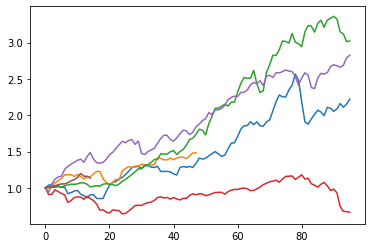

In [16]:
plt.plot(reagan["index"], reagan["Percentage"])

plt.plot(bushsr["index"], bushsr["Percentage"])
                
plt.plot(clinton["index"], clinton["Percentage"])
plt.plot(bushjr["index"], bushjr["Percentage"])
plt.plot(obama["index"], obama["Percentage"])
plt.plot(trump["index"], trump["Percentage"])

In [ ]:
#Plot Date vs SP500
plt.plot(sp500["Date"], sp500["SP500"])

In [ ]:
#President_data2 starts at Ulysses 
president_data2=president_data.tail(-17)
president_data2

In [ ]:
#sp500_groups=sp500.groupby("President")
#sp500_new=sp500_groups.first()
#sp500_new
#sp500_new.dropna(how='any')
#sp500_groups.reset_index()

In [ ]:
#-------END

In [ ]:
#plt.plot(sp500_groups., us_gdp_clean["gdp_float"])

In [ ]:
#Mexico GDP
mexico_gdp=pd.read_csv("Resources/MexicoGDP.csv")
mexico_gdp.head()

In [ ]:
#USA GDP
us_gdp=pd.read_csv("Resources/USGDP.csv")
us_gdp.head()


In [ ]:
#US GDP Cleaned to numeric & date time
##us_gdp["GDP"] = pd.to_numeric(us_gdp["GDP"])
us_gdp_clean = us_gdp.drop(us_gdp.index[72])
us_gdp_clean['gdp_float'] = us_gdp_clean["GDP"].astype(float)
us_gdp_clean.head()
us_gdp.DATE=pd.to_datetime(us_gdp['DATE'])

In [ ]:
#GDP from 1947 to 2018 in US
plt.plot(us_gdp_clean["DATE"], us_gdp_clean["gdp_float"])